# 株価予測

今後の資金運用の為に株価の予測し投資の参考にしたい。

今回はかの有名なIT企業Appleの株価を予測してみる。

データの詳細はhttps://www.kaggle.com/varpit94/apple-stock-data-updated-till-22jun2021　より確認できます。

In [1]:
#モジュール読み込み
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA

import seaborn as sns
sns.set()

In [38]:
#データの読み込み日付データの最適化
data = pd.read_csv("AAPL.csv",index_col="Date", parse_dates=["Date"])
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100751,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095495,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088485,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090676,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093304,73449600


In [45]:
#40年分はデータ量が多いので今回は2年分に。そして市場休日のデータを前日の終値で埋めて、終値の列を抽出
data2 = data.loc["2019-06-22":"2021-06-22",["Close"]].resample("D").ffill()
data2

,Close
Date,
2019-06-24,49.645000
2019-06-25,48.892502
2019-06-26,49.950001
2019-06-27,49.935001
2019-06-28,49.480000
...,...
2021-06-18,130.460007
2021-06-19,130.460007
2021-06-20,130.460007


In [50]:
#statsmodelsのARIMAモデルを使用する為最適なパラメーターをAICから判断
# p,d,qの初期値
start_p = 0
start_d = 2  #dが１の時は予測がうまくいかなかった為２で固定
start_q = 0

# p,d,qの最大値
max_p = 3
max_d = 2
max_q = 3

# aicの最小値を格納する変数
min_aic = 100000

# aicが最小値のときのp,d,q
best_p = 0
best_d = 2
best_q = 0

# AICを総当たりで調べる
for p in range(start_p, max_p + 1):
    for d in range(start_d, max_d + 1):
        for q in range(start_q, max_q + 1):
            model = ARIMA(data2, order=(p, d, q), freq=data2.index.inferred_freq)
            model_fit = model.fit(disp=False)

            aic = model_fit.aic
            print(f'ARIMA: ({p}, {d}, {q}); AIC={aic}')
            if min_aic > model_fit.aic:
                min_aic = model_fit.aic
                best_p = p
                best_d = d
                best_q = q

# AICが最小値のときのp,d,qを表示
print(f'\nModel: ARIMA({best_p}, {best_d}, {best_q}); AIC={min_aic}')

ARIMA: (0, 2, 0); AIC=3528.191244564291
ARIMA: (0, 2, 1); AIC=2947.8593864241316
ARIMA: (0, 2, 2); AIC=2939.0376953960654
ARIMA: (0, 2, 3); AIC=2941.0047202220553
ARIMA: (1, 2, 0); AIC=3252.2504452837256
ARIMA: (1, 2, 1); AIC=2938.9078527887027
ARIMA: (1, 2, 2); AIC=2940.838077022482


/home/ubuntu/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


ARIMA: (1, 2, 3); AIC=2942.7677308206103
ARIMA: (2, 2, 0); AIC=3173.539632317964
ARIMA: (2, 2, 1); AIC=2940.8889536823317


/home/ubuntu/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA: (2, 2, 2); AIC=2942.6960043243894
ARIMA: (2, 2, 3); AIC=2942.25168104345
ARIMA: (3, 2, 0); AIC=3124.1300949567158
ARIMA: (3, 2, 1); AIC=2941.0147887553903
ARIMA: (3, 2, 2); AIC=2944.3230773146224


/home/ubuntu/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/ubuntu/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/ubuntu/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/ubuntu/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


ARIMA: (3, 2, 3); AIC=2938.9036260203384

Model: ARIMA(3, 2, 3); AIC=2938.9036260203384


/home/ubuntu/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/home/ubuntu/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [47]:
#最適なパラメーターで予測にかけて結果を表示
model = ARIMA(data2, order=(3,2,3), freq=data2.index.inferred_freq)
model_fit = model.fit(disp=False)
model_fit.summary()

/home/ubuntu/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/home/ubuntu/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Close   No. Observations:                  728
Model:                 ARIMA(3, 2, 3)   Log Likelihood               -1461.452
Method:                       css-mle   S.D. of innovations              1.792
Date:                Mon, 05 Jul 2021   AIC                           2938.904
Time:                        23:47:56   BIC                           2975.626
Sample:                    06-26-2019   HQIC                          2953.073
                         - 06-22-2021                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.669e-05      0.000     -0.128      0.898      -0.001       0.001
ar.L1.D2.Close    -1.9955      0.043    -45.936      0.000      -2.081      -1.910
ar.L2.D2.Close    -1.1767      0.078    -15.136      0.000      -1.329      -1.024
ar.L3.D2.Close    -0.0965      0.039     -2.488      0.013      -0.173      -0.020
ma.L1.D2.Close     0.8862      0.023     38.759      0.000       0.841       0.931
ma.L2.D2.Close    -0.9062      0.009   -100.386      0.000      -0.924      -0.888
ma.L3.D2.Close    -0.9800      0.022    -45.541      0.000      -1.022      -0.938
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9568           -0.3044j            1.0040           -0.4510
AR.2           -0.9568           +0.3044j            1.0040            0.4510
AR.3          -10.2804           -0.0000j           10.2804           -0.5000
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.9623           -0.3071j            1.0101           -0.4508
MA.3           -0.9623           +0.3071j            1.0101            0.4508
-----------------------------------------------------------------------------
"""

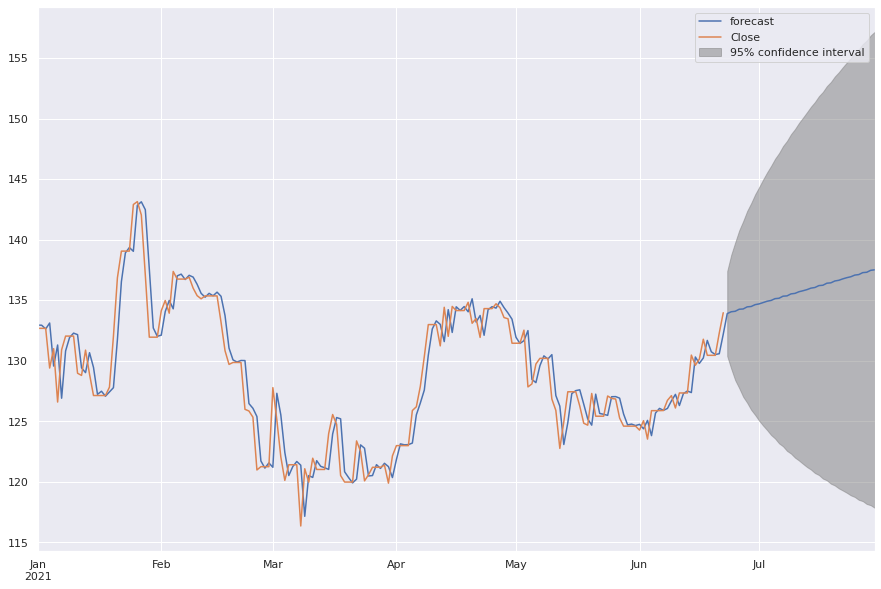

In [48]:
#プロットして視覚的に確認。見やすくする為startを2021年1月1日に変更
fig, ax = plt.subplots(figsize=(15,10))
fig = model_fit.plot_predict(start="2021-01-01", end="2021-07-30", ax=ax)

この予測では2021年6月22日以降は株価が上昇する傾向にあるという事がわかるが実際どうなのだろうか。

2021年6月23日から2021年7月2日のデータは下記に記します。

日付　　　　　　　終値

2021年7月2日　 139.96

2021年7月1日　 137.27

2021年6月30日　136.96

2021年6月29日　136.33

2021年6月28日　134.78

2021年6月25日　133.11

2021年6月24日　133.41

2021年6月23日　133.70

※Yahoo!ファイナンスより一部抜粋

終値の上昇傾向と値が95%信頼区間に収まっているのがわかり予測は概ね成功していると言えます。